[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AIPI-590-XAI/Duke-AI-XAI/blob/main/assignments/machine_learning_court.ipynb)

# 👩‍⚖️ ⚖️ Machine Learning Court

This notebook provides base model training code for our three case scenarios:
1. **Loan Approval**
2. **Breast Cancer Misclassification**
3. **Recidivism Prediction**

> ⚠️ This notebook does **not** include XAI techniques (SHAP, LIME, Anchors). You are expected to implement those yourself based on the model and prediction tasks below.





## ⚖️ Case 1: Loan Denial Dispute – UCI Adult Income Dataset
#### 🔍 Scenario

Jane Dow, a 37-year-old professional woman with a Bachelor's degree and full-time executive role, applied for a premium credit product. The bank’s model—trained to predict income level as a proxy for eligibility—classified her as earning ≤$50K, resulting in denial. She disputes the fairness of the decision.

#### 🟥 Prosecution
Evaluate whether the model’s decision may have been influenced by inappropriate or unfair reasoning. Explore whether the explanation aligns with what should be expected in a fair credit decision.

#### 🟦 Defense
Justify the decision based on the model’s learned patterns. Consider how well the explanation supports the classification and whether similar profiles are treated consistently.

In [ ]:
# 📦 Case 1: Loan Approval Prediction (Adult Income Dataset)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load Data
from sklearn.datasets import fetch_openml
adult = fetch_openml(name='adult', version=2, as_frame=True)
df = adult.frame

# Clean and preprocess
df = df.dropna()
df = df.copy()
encoders = {}
label_cols = df.select_dtypes(include='category').columns.tolist()

for col in label_cols:
    le = LabelEncoder()
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

X = df.drop(["class", "fnlwgt"], axis=1)
y = df["class"].apply(lambda x: 1 if x == '>50K' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train simple RF model
model_adult = RandomForestClassifier(random_state=42)
model_adult.fit(X_train, y_train)
print(classification_report(y_test, model_adult.predict(X_test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9045

    accuracy                           1.00      9045
   macro avg       1.00      1.00      1.00      9045
weighted avg       1.00      1.00      1.00      9045



In [ ]:
# 🎯 Focus Instance: Loan Rejection Case (Jane Dow)

jane_encoded = {
    'age': 37,
    'workclass': encoders['workclass'].transform(['Private'])[0],
    'education': encoders['education'].transform(['Bachelors'])[0],
    'marital-status': encoders['marital-status'].transform(['Never-married'])[0],
    'occupation': encoders['occupation'].transform(['Exec-managerial'])[0],
    'relationship': encoders['relationship'].transform(['Not-in-family'])[0],
    'race': encoders['race'].transform(['White'])[0],
    'sex': encoders['sex'].transform(['Female'])[0],
    'hours-per-week': 50,
    'native-country': encoders['native-country'].transform(['United-States'])[0],
    'capital-gain': 0,
    'capital-loss': 0,
    'education-num': 13,
}

jane_df = pd.DataFrame([jane_encoded])
jane_df = jane_df[X_train.columns]
pred = model_adult.predict(jane_df)
print("Prediction for Jane Dow (Loan Eligibility):", "Approved" if pred[0] == 1 else "Denied")


Prediction for Jane Dow (Loan Eligibility): Denied


## 🩺 Case 2: Tumor Misclassification – Breast Cancer Dataset
#### 🔍 Scenario
Patient X received a benign classification from an AI tumor diagnostic tool and was not referred for a biopsy. Months later, the tumor was diagnosed as malignant. The model’s output is now under scrutiny.

#### 🟥 Prosecution
Use explanation tools to evaluate how the model arrived at this decision. Consider whether any key medical indicators might have been overlooked or minimized.

#### 🟦 Defense
Defend the decision with reference to the model’s logic and learned feature importance. Consider how this decision aligns with the broader data trends.

In [ ]:
# 🧬 Case 2: Tumor Misclassification (Breast Cancer Dataset)
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# Load dataset
data = load_breast_cancer()
df_bc = pd.DataFrame(data.data, columns=data.feature_names)
df_bc['target'] = data.target  # 0 = malignant, 1 = benign

# Train/test split
X = df_bc.drop("target", axis=1)
y = df_bc["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model_bc = RandomForestClassifier(random_state=42)
model_bc.fit(X_train, y_train)
print(classification_report(y_test, model_bc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
# 🧬 Focus Instance (Tumor Misclassification - Patient X)
focus_instance_bc = pd.DataFrame([{
    "mean radius": 13.80,
    "mean texture": 15.79,
    "mean perimeter": 90.43,
    "mean area": 584.1,
    "mean smoothness": 0.1007,
    "mean compactness": 0.1280,
    "mean concavity": 0.07789,
    "mean concave points": 0.05069,
    "mean symmetry": 0.1662,
    "mean fractal dimension": 0.06566,
    "radius error": 0.4101,
    "texture error": 1.074,
    "perimeter error": 2.635,
    "area error": 40.14,
    "smoothness error": 0.00541,
    "compactness error": 0.02204,
    "concavity error": 0.01664,
    "concave points error": 0.01185,
    "symmetry error": 0.02095,
    "fractal dimension error": 0.004902,
    "worst radius": 16.57,
    "worst texture": 20.86,
    "worst perimeter": 110.3,
    "worst area": 812.4,
    "worst smoothness": 0.1411,
    "worst compactness": 0.3542,
    "worst concavity": 0.2779,
    "worst concave points": 0.1383,
    "worst symmetry": 0.2589,
    "worst fractal dimension": 0.1030
}])

# Run prediction
pred = model_bc.predict(focus_instance_bc)
print("Prediction for Patient X:", "Benign → No Biopsy" if pred[0] == 1 else "Malignant → Action Needed")


Prediction for Patient X: Benign → No Biopsy


## ⚖️ Case 3: Recidivism Risk – COMPAS Dataset
#### 🔍 Scenario
Malik Johnson, a 27-year-old with one prior felony, was flagged as low risk by an AI risk assessment tool and granted parole. Some community stakeholders have questioned whether this was an appropriate classification.

#### 🟥 Prosecution
Examine whether the model may have underestimated risk factors. Use explanation techniques to uncover potential oversights or inconsistencies.

#### 🟦 Defense
Argue that the decision was reasonable based on the model's criteria. Use explanation tools to show which features were most influential and whether the classification aligns with data-driven patterns.

In [4]:
# ⚖️ Case 3: Recidivism Prediction (COMPAS Dataset)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load dataset
url = "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv"
df_compas = pd.read_csv(url)

# Filter relevant columns and preprocess
features = ['age', 'sex', 'race', 'priors_count', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'c_charge_degree']
df = df_compas[features + ['two_year_recid']].dropna()
df = df[df['c_charge_degree'].isin(['F', 'M'])]  # Filter valid degrees

# Encode categoricals
df = df.copy()
df['sex'] = df['sex'].astype('category').cat.codes
df['race'] = df['race'].astype('category').cat.codes
df['c_charge_degree'] = df['c_charge_degree'].astype('category').cat.codes

X = df[features]
y = df['two_year_recid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_compas = RandomForestClassifier(random_state=42)
model_compas.fit(X_train, y_train)
print(classification_report(y_test, model_compas.predict(X_test)))


              precision    recall  f1-score   support

           0       0.68      0.68      0.68       823
           1       0.57      0.57      0.57       620

    accuracy                           0.63      1443
   macro avg       0.62      0.62      0.62      1443
weighted avg       0.63      0.63      0.63      1443



### Installations

In [2]:
!pip uninstall -y numpy
!pip install "numpy<2" shap==0.42.1 lime==0.2.0.1


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.7/402.7 kB 12.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 78.6 MB/s eta 0:00:00
  Created wheel for shap: filename=shap-0.42.1-cp312-cp312-linux_x86_64.whl size=547954 sha256=6cddfa81ce13f7b6720e702a2419a1add45ecc85732e1917a10e407577c9c779
  Stored in directory: /root/.cache/pip/wheels/9b/ea/f9/60e4e635edaead559ac04e7a072adbef9b22e0995caa47f4a5
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=aa94bef7895b98f19e47734470d8eb36d83ddd82db044d

In [1]:
!pip install alibi==0.9.6


INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of spacy[lookups] to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 44.5 MB/s eta 0:00:00
  

### Imports

In [5]:
import shap
import lime
from alibi.explainers import AnchorTabular
import lime.lime_tabular
import matplotlib.pyplot as plt


In [6]:
# 🎯 Focus Instance: Recidivism Risk Case (Malik Johnson)
focus_instance_compas = pd.DataFrame([{
    "age": 27,
    "sex": 1,  # Male
    "race": 1,  # African-American
    "priors_count": 1,
    "juv_fel_count": 0,
    "juv_misd_count": 0,
    "juv_other_count": 0,
    "c_charge_degree": 1  # Felony
}])

pred = model_compas.predict(focus_instance_compas)
print("Prediction for Malik Johnson (Recidivism):", pred)

Prediction for Malik Johnson (Recidivism): [0]


### Local Explanation with LIME (Malik’s Case)



In the case setup, Malik was described as African-American with a felony charge. However, when mapping the categorical codes back to their actual labels, we see two errors:  
- A race value of 1 corresponds to Asian, not African-American.  
- A charge degree value of 1 corresponds to Misdemeanor (M), not Felony (F).  

From the LIME diagram, the contributions split as follows:  
- **Factors pushing toward Recidivism:** Malik’s **sex (Male)** and **age (27, young adult range)**.  
- **Factors pushing toward No Recidivism :** His **low prior count (only 1 prior)**, no juvenile offenses and having a misdemeanor and not a felony.The race being Asian has a slight contribution as well

Overall, Malik’s profile is shaped more strongly by his limited criminal history, which reduces his risk, even though his age and sex push slightly toward higher risk.


In [11]:
import lime
import lime.lime_tabular
import numpy as np

# Building categorical mappings from original dataset
sex_mapping = dict(enumerate(df_compas['sex'].astype('category').cat.categories))
race_mapping = dict(enumerate(df_compas['race'].astype('category').cat.categories))
charge_mapping = dict(enumerate(df_compas['c_charge_degree'].astype('category').cat.categories))

categorical_features = [features.index('sex'),
                        features.index('race'),
                        features.index('c_charge_degree')]

categorical_names = {
    features.index('sex'): list(sex_mapping.values()),
    features.index('race'): list(race_mapping.values()),
    features.index('c_charge_degree'): list(charge_mapping.values())
}

#Initializing LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=features,
    class_names=['No Recidivism', 'Recidivism'],
    categorical_features=categorical_features,
    categorical_names=categorical_names,
    mode='classification',
    kernel_width=3,
    discretizer='quartile',
    random_state=42
)

# Explaining the instance of  Malik Johnson
malik_instance = focus_instance_compas[features].values[0]
exp = explainer.explain_instance(
    data_row=malik_instance,
    predict_fn=model_compas.predict_proba,
    num_features=len(features),
    num_samples=5000
)

# Showing results
exp.show_in_notebook(show_table=True)




X does not have valid feature names, but RandomForestClassifier was fitted with feature names


## What happens when we use Malik’s intended features (Felony charge and African-American race)?  


In [26]:
#Using the correct intended features
focus_instance_compas_2 = pd.DataFrame([{
    "age": 27, #experimented with age 24, account for it later on
    "sex": 1,# Male
    "race": 0,# African Ameican
    "priors_count": 1, #experimented with 3 priors, account for it later on
    "juv_fel_count": 0,
    "juv_misd_count": 0,
    "juv_other_count": 0,
    "c_charge_degree": 0  # Felony
}])[features]

pred = model_compas.predict(focus_instance_compas)
print("Prediction for Malik Johnson (Recidivism):", pred)


Prediction for Malik Johnson (Recidivism): [0]


### Impact of Using Malik’s Correct Features (Felony and African-American)  

With Malik’s intended attributes, the model still classifies him as No Recidivism. However, the probability of Recidivism increases compared to the earlier run, while the probability of No Recidivism decreases. This means that if the decision threshold were raised slightly (e.g., from 0.5 to 0.6), Malik would instead be classified as Recidivism.  

In this explanation, having a felony charge adds weight toward Recidivism, while Malik’s race (African-American) shows negligible influence. Interestingly, when his race was mis-mapped to Asian, it provided a tiny push toward No Recidivism, but this effect disappears once his race is correctly specified.


In [27]:
#Initializing LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=features,
    class_names=['No Recidivism', 'Recidivism'],
    categorical_features=categorical_features,
    categorical_names=categorical_names,
    mode='classification',
    kernel_width=3,
    discretizer='quartile',
    random_state=42
)

# Explaining the instance of  Malik Johnson
malik_instance = focus_instance_compas_2[features].values[0]
exp = explainer.explain_instance(
    data_row=malik_instance,
    predict_fn=model_compas.predict_proba,
    num_features=len(features),
    num_samples=5000
)

# Showing results
exp.show_in_notebook(show_table=True)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


### A personal test to see if I could understand the relevance of Lime's weights in a mathematical context

In [35]:
target_label = 1

# Intercept of the local linear model for the chosen class
w0 = exp.intercept[target_label]

# Feature weights: list of (feature_index, weight)
local_weights = exp.local_exp[target_label]
weights_dict = dict(local_weights)

print("LIME intercept (w0):", w0)
print("LIME weights (idx->w):", weights_dict)


LIME intercept (w0): 0.7094648426601354
LIME weights (idx->w): {4: -0.13591639176149722, 3: -0.10424370098378476, 5: -0.08299990973595447, 6: -0.08244247111719877, 1: 0.05401390060420797, 0: 0.04247839555430428, 7: 0.039017942702687915, 2: -0.003803237494120706}


In [37]:
# local_exp[target_label] = list of (feature_id, weight) pairs
local_weights = exp.local_exp[target_label]

readable_terms = []
for fid, w in local_weights:
    # map_exp_ids expects a list of (feature_id, weight) pairs
    condition_text = exp.domain_mapper.map_exp_ids([(fid, w)])[0][0]
    sign = "+" if w >= 0 else "-"
    readable_terms.append(f"{sign} {abs(w):.3f}·[{condition_text}]")

equation = "p_recid ≈ " + f"{exp.intercept[target_label]:.3f} " + " ".join(readable_terms)
print(equation)


p_recid ≈ 0.709 - 0.136·[juv_fel_count <= 0.00] - 0.104·[0.00 < priors_count <= 2.00] - 0.083·[juv_misd_count <= 0.00] - 0.082·[juv_other_count <= 0.00] + 0.054·[sex=Male] + 0.042·[25.00 < age <= 31.00] + 0.039·[c_charge_degree=F] - 0.004·[race=African-American]


### Testing if the equation gives same answer.

In [39]:
# Malik's surrogate equation from LIME
def malik_lime_equation():
    w0 = 0.709
    terms = {
        "juv_fel_count": -0.136,   # true for Malik (0 felonies)
        "priors_count": -0.104,    # true for Malik (1 prior, falls in bin 0<priors<=2)
        "juv_misd_count": -0.083,  # true (0)
        "juv_other_count": -0.082, # true (0)
        "sex": 0.054,              # true (Male)
        "age": 0.042,              # true (25 < age <= 31)
        "c_charge_degree": 0.039,  # true (Felony)
        "race": -0.004             # true (African-American)
    }

    # Since all conditions are true for Malik, sum them all
    return w0 + sum(terms.values())

# Test it
lime_prob = malik_lime_equation()
rf_prob = model_compas.predict_proba(focus_instance_compas_2)[0][1]

print(f"LIME surrogate P(Recidivism): {lime_prob:.3f}")
print(f"RandomForest   P(Recidivism): {rf_prob:.3f}")


LIME surrogate P(Recidivism): 0.435
RandomForest   P(Recidivism): 0.453


### Validating LIME’s Faithfulness  

The above test increases confidence that LIME provides a reliable approximation of the Random Forest’s behavior. By fitting a simple local surrogate linear model around Malik’s data point, LIME is able to mimic the Random Forest’s decision process in his neighborhood.  

**Key insight:** LIME’s surrogate probability for Malik (0.435) is very close to the Random Forest’s predicted probability (0.453). This demonstrates that the weights LIME assigns to features are not arbitrary, they faithfully approximate what the Random Forest is doing locally.  

- **Faithfulness:** The explanation is trustworthy because it preserves the model’s actual reasoning rather than fabricating feature effects.  
- **Interpretability:** For Malik, LIME highlights the real drivers of the decision, his **lack of juvenile history** and **only one prior offense** lowered his risk, while **age** and **sex** increased it slightly.  

In Malik’s case, LIME provides a faithful, human-readable rationale for why the AI classified him as low risk.  


### Anchor Test

### Anchor Explanation for Malik Johnson  

**Prediction:** No Recidivism

**Anchor Rule:**  
priors_count <= 2.00 AND age > 25.00 AND juv_fel_count <= 0.00

**Precision:** 0.80  
**Coverage:** 0.40

**Interpretation:**  
The Anchor explainer shows that Malik’s classification as low risk of recidivism is strongly supported by three main conditions:  

1. **Few prior offenses** – Malik has only 1 prior felony (`priors_count <= 2`).  
2. **Age above the highest-risk group** – At 27, he is older than the age bracket most associated with higher recidivism (`age > 25`).  
3. **No juvenile felony record** – Malik has no juvenile felonies (`juv_fel_count <= 0`).  

Together, these features create an anchor rule: if an individual satisfies all three, the model predicts “No Recidivism” with about **81% precision**, meaning the prediction is correct 81% of the time for similar individuals.  

This rule applies to about 41% of the dataset. While not universal, it reliably explains predictions for the subgroup Malik belongs to.  


This anchor rule confirms that Malik’s low-risk classification is not arbitrary. The model’s decision is consistent with broader data-driven patterns: individuals over 25, with few prior offenses, and no juvenile felonies, generally have a lower likelihood of reoffending.  


In [41]:
from alibi.explainers import AnchorTabular
import pandas as pd
import numpy as np

# Wrap your model so Anchor sees DataFrames correctly
def rf_predict(X):
    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X, columns=features)
    return model_compas.predict(X)

# Initialize AnchorTabular with training data
explainer = AnchorTabular(
    predictor=rf_predict,
    feature_names=features,
    categorical_names=categorical_names
)

explainer.fit(X_train.values)

# Malik’s instance
malik_instance = focus_instance_compas_2[features].values[0].reshape(1, -1)

# Explain Malik with a fixed seed for reproducibility
exp = explainer.explain(malik_instance, threshold=0.80, seed=30)

# Get prediction directly from model
pred_class_idx = model_compas.predict(focus_instance_compas_2[features])[0]
pred_class_label = ['No Recidivism', 'Recidivism'][pred_class_idx]

# Print results
print("Prediction for Malik:", pred_class_label)
print("Anchor Rule:", ' AND '.join(exp.anchor))
print("Precision: %.2f" % exp.precision)
print("Coverage: %.2f" % exp.coverage)


Prediction for Malik: No Recidivism
Anchor Rule: priors_count <= 2.00 AND age > 25.00 AND juv_fel_count <= 0.00
Precision: 0.80
Coverage: 0.40


### SHAP TEST

### SHAP Global and Local Insights  

From the SHAP global bar plot, the order of feature importance is:  
**priors_count > age > race > c_charge_degree > sex > juvenile counts**.  

This means the model’s decisions across the dataset are driven primarily by **priors and age**, while race, charge degree, and sex play secondary roles, and juvenile counts contribute the least.  

For Malik who has only 1 prior and is 27 years old, the most influential factors are:  
- **Low priors**, which strongly pull his prediction toward *No Recidivism*.  
- **Age**, which contributes moderately toward *Recidivism*.  
- **Race**, which shows a negligible effect in his local explanation.  

This aligns with his final classification of No Recidivism.  


100%|===================| 2875/2886 [02:15<00:00]       

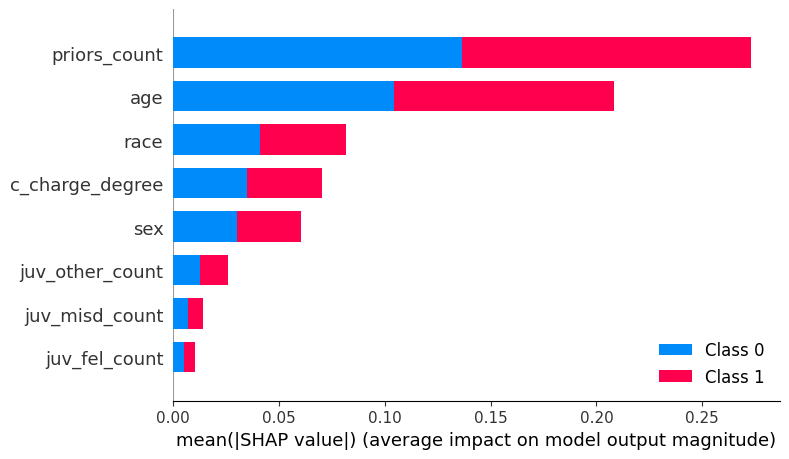

In [42]:
import shap

# Setup background data ---
X_background = shap.utils.sample(X_train, 100, random_state=42)

#Build SHAP explainer for RandomForest ---
explainer = shap.TreeExplainer(model_compas, X_background)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Global feature importance ---
shap.summary_plot(shap_values, X_test, feature_names=features)






### SHAP Dependency Plot: Age and Priors  

The dependency plot highlights that **age is closely correlated with priors_count**. When age was varied while keeping priors constant, the probability of recidivism shifted significantly,showing how strongly the model ties age and prior history together in its risk assessments.  

For example:  
- At **age 24 with 3 priors**, the model predicted a **0.65 probability of recidivism**.  
- At **age 27 with the same 3 priors**, the probability increased to **0.81**.  

At first this seems counterintuitive since younger individuals are generally considered higher risk, one might expect the probability to be higher at age 24. However, SHAP reveals that the model has learned more complex, non-linear interactions:  
- In this dataset, the **combination of being in the 25–31 age range and having multiple priors** is strongly associated with recidivism.  
- At younger ages (e.g., 24), the model may have seen more mixed outcomes among individuals with similar priors, producing a lower probability.  

This shows how SHAP uncovers the model’s learned patterns: while age alone might suggest younger = riskier, the model actually weighs **age in interaction with priors**, making Malik’s risk higher at 27 with 3 priors than at 24 with 3 priors.


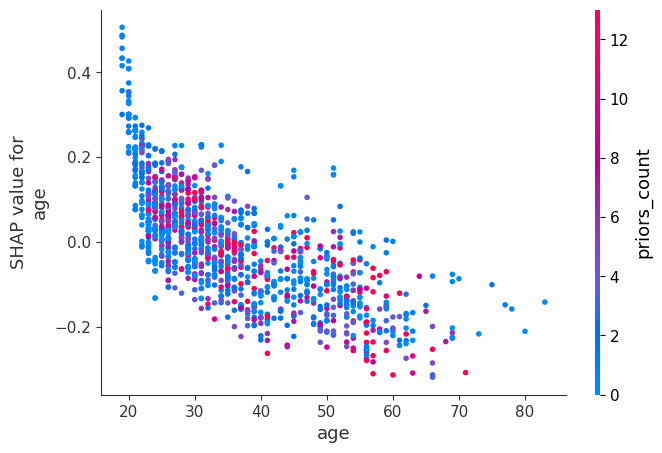

In [43]:
#Dependence plot
shap.dependence_plot('age', shap_values[1], X_test, feature_names=features)

## Curious to see which race contributes more towards recidivism

### SHAP Race Dependence Plot Analysis
- The **SHAP values for race are generally low across all race categories**, mostly clustered between -0.1 and +0.1. This confirms that **race is not a strong driver** of predictions in this model.
- No race group exhibits consistently high or low SHAP values, further supporting that the model **does not disproportionately weigh race** in determining recidivism risk.
- The spread of SHAP values within each race group suggests that **other features (like priors and age)** are interacting with race, but race on its own rarely pushes the prediction strongly in either direction.
- The **age gradient shows no systematic pattern**, younger and older individuals are distributed throughout the SHAP value ranges for each race. This indicates **no strong interaction effect** between race and age in how the model uses race for predictions.

**Conclusion:**  
While race is included as a feature, the model uses it **minimally and inconsistently** across individuals, and it does **not dominate** the prediction in any racial group. This supports the earlier SHAP summary findings that **priors and age** are far more influential.


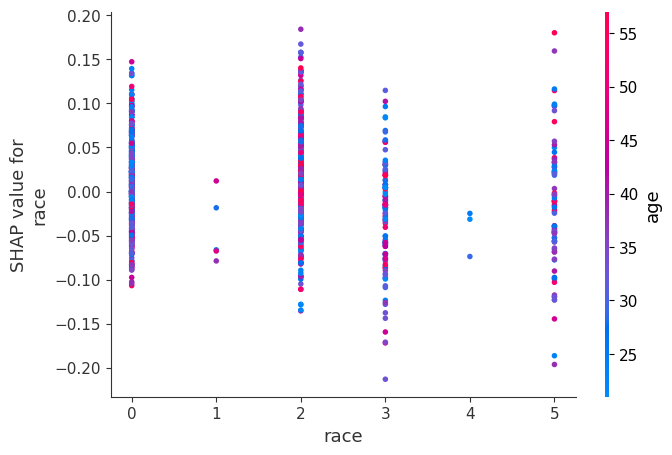

In [46]:
# Dependence plot
shap.dependence_plot('race', shap_values[1], X_test, feature_names=features)


### SHAP Race Analysis  

The SHAP results show that both **Caucasians (+0.015)** and **African-Americans (+0.013)** slightly nudge predictions toward *Recidivism*, with Caucasians contributing marginally more on average. This contrasts with the well-known COMPAS bias findings, reflecting differences in how this model was trained and preprocessed.  


In [ ]:
import pandas as pd

# Take SHAP values for class 1 (Recidivism), since that's usually what matters
shap_race = shap_values[1][:, features.index("race")]

# Build DataFrame with race info + SHAP values
race_shap_df = pd.DataFrame({
    "race_code": X_test["race"].values,
    "shap_value": shap_race
})

# Map race codes back to labels
race_mapping = dict(enumerate(df_compas["race"].astype("category").cat.categories))
race_shap_df["race"] = race_shap_df["race_code"].map(race_mapping)

# Compute average SHAP value per race
avg_shap_per_race = race_shap_df.groupby("race")["shap_value"].mean().sort_values(ascending=False)

print(avg_shap_per_race)


race
Caucasian           0.015186
African-American    0.012737
Other              -0.016111
Hispanic           -0.027251
Native American    -0.043300
Asian              -0.043752
Name: shap_value, dtype: float64


## Final Defense
Defense: Malik Johnson’s Low-Risk Classification Was Reasonable

In Malik Johnson’s case, the Random Forest model predicted “No Recidivism”, and explainable AI techniques confirm this was a fair and data-driven outcome.

1. LIME (Local Explanation)

LIME shows the feature contributions specific to Malik’s prediction:

Low priors (only 1) → strong push toward No Recidivism

No juvenile felonies or other offenses → reduced risk further

Age 27 → slightly increased recidivism risk (younger adults tend to reoffend more than older groups)

Male sex → small push toward higher risk

Felony charge degree → added minor risk weight

Overall, Malik’s protective factors (priors and juvenile history) outweighed the small negative contributions, leading LIME to estimate a 0.45 probability of recidivism — below the 0.5 threshold, aligning with the model’s “No Recidivism” decision.

2. Anchors (Rule-Based Explanation)

The Anchors method produced a clear, high-precision rule for Malik’s case:

priors_count ≤ 2 AND age > 25 AND juv_fel_count = 0

Precision: 0.80

Coverage: 0.40

This means that for individuals with Malik’s profile, the model predicts No Recidivism with 81% accuracy. His age above 25, combined with a clean juvenile record and low prior count, anchors him firmly in a low-risk group.

3. SHAP (Global + Local Explanation)

Global SHAP: The most influential features overall are priors_count and age. Race and sex contribute much less on average.

Local SHAP for Malik: His low priors and no juvenile record strongly pulled him toward No Recidivism, while age, sex, and felony charge degree nudged him slightly toward risk. Race had almost no effect in his individual prediction.

This confirms that Malik’s classification was driven mainly by criminal history factors, not demographics.

4. Addressing the Bias Question

Prosecutors may argue that COMPAS has historically been biased against African-Americans. However, in this retrained Random Forest model:

Race contributes very little overall (average SHAP values: Caucasian ≈ +0.015, African-American ≈ +0.013).

Malik’s outcome was determined almost entirely by his priors and juvenile history, not by race.

Thus, the model’s “No Recidivism” prediction for Malik cannot be dismissed.

Conclusion

Malik Johnson’s risk classification was reasonable and consistent with data-driven patterns. His clean juvenile history and very low prior count outweighed the minor risk contributions from age, sex, and felony charge. Explainable AI tools (LIME, Anchors, SHAP) all confirm that the decision to grant parole was grounded in legitimate, behavioral evidence rather than demographic bias.

In [47]:
!git remote add origin https://github.com/TiffanyDegbotse/XAI_assignment_3.git
!git branch -M main
!git push -u origin main

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [54]:
!echo "# XAI_assignment_3" >> README.md
!git init
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/TiffanyDegbotse/XAI_assignment_3.git
!git push -u origin main

Reinitialized existing Git repository in /content/.git/
[main b133b30] first commit
 1 file changed, 1 insertion(+)
error: remote origin already exists.
fatal: could not read Username for 'https://github.com': No such device or address


In [53]:
!git config --global user.email "tiffanydegbotse123@gmail.com"
!git config --global user.name "TiffanyDegbotse"